Assessment 2 for OSESM.

In [1]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

Import Data from https://data.ece.iiasa.ac.at/ar6

'ar6_data.xlsx' is filled with data from two scenarios of the same model.

The used Model is: MESSAGEix-GLOBIOM_1.1

The two scenarios are:
 - EN_NPi2020_1000
     - category C3: limit warming to 2°C (>67%)
 - EN_NPi2020_3000
     - category C6: limit warming to 3°C (>50%)
 


In [2]:
df = pyam.IamDataFrame('ar6_data.xlsx')
df

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ar6_data.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM_1.1 (1)
 * scenario : EN_NPi2020_1000, EN_NPi2020_3000 (2)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (6)
   unit     : EJ/yr, K, Mt CO2/yr (3)
   year     : 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, ... 2100 (101)
Meta indicators:
   exclude (bool) False (1)

Show correlation bewteen CO2 Emissions and rising temperatures

NameError: name 'model' is not defined

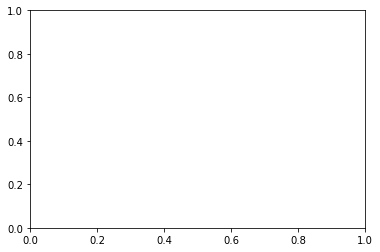

In [3]:
fig, ax = plt.subplots()

#filter data
data_temperature_1000 = df.filter(model = model, 
                             scenario = ['EN_NPi2020_1000'], 
                             variable=['AR6*'],
                             year = range(2000,2101))
data_temperature_3000 = df.filter(model = model, 
                             scenario = ['EN_NPi2020_3000'], 
                             variable=['AR6*'],
                             year = range(2000,2101))

data_emissions_1000 = df.filter(model = model, 
                                scenario = ['EN_NPi2020_1000'], 
                                variable=['Emissions*'],
                                year = range(2000,2101))
data_emissions_3000 = df.filter(model = model, 
                                scenario = ['EN_NPi2020_3000'], 
                                variable=['Emissions*'],
                                year = range(2000,2101))

#plot data
format_kwargs = dict(legend=False, title=None)
data_temperature_1000.plot(ax=ax, color = 'g', label="Temperature 1000")
data_temperature_3000.plot(ax=ax, color = 'r', label="Temperature 3000")

#generate a second (hidden) x-axis
ax2 = ax.twinx()

format_kwargs = dict(legend=False, title=None, linestyle="--", marker="o")
data_emissions_1000.plot(ax=ax2, **format_kwargs, color = 'g', label="CO2 Emissions 1000")
data_emissions_3000.plot(ax=ax2, **format_kwargs, color = 'r', label="CO2 Emissions 3000")



ax.legend(loc=3)
ax2.legend(loc=4)
ax.set_ylim(0, 3)
ax.set_title("Temperature and CO2 Emissons")

plt.show()

Show Electrification rate in two scenarios

In [ ]:
fig, ax = plt.subplots()

electricity_df = df.filter(model = model,
                           variable = ['Primary*', 'Secondary Energy*'],
                           year = range(2000,2101))
#filter data
data_primenergy_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                              variable = ['Primary*'])
data_primenergy_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                              variable = ['Primary*'])

data_emissions_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                            variable = ['Secondary Energy|Electricity'])
data_emissions_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                            variable = ['Secondary Energy|Electricity'])

#calculate percentage of electricity share
electricity_energy_df = electricity_df.filter(variable = ['Primary*', 'Secondary Energy|Electricity'])

data_share_electricity =    (
                                electricity_energy_df.divide("Secondary Energy|Electricity", "Primary Energy", "Share of Electricity in Energy")
                                #.rename(unit={"": "%"})
                                #.timeseries()
                            )
data_share_electricity_1000 = data_share_electricity.filter(scenario = ['EN_NPi2020_1000'])
data_share_electricity_3000 = data_share_electricity.filter(scenario = ['EN_NPi2020_3000'])


#plot data
format_kwargs = dict(legend=False, title=None)
data_primenergy_1000.plot(ax=ax, color = 'g', label="Primary Energy 1000")
data_primenergy_3000.plot(ax=ax, color = 'r', label="Primary Energy 3000")

format_kwargs = dict(legend=False, title=None)
data_emissions_1000.plot(ax=ax, **format_kwargs, label="Secondary Energy|Electricity 1000")
data_emissions_3000.plot(ax=ax, **format_kwargs, label="Secondary Energy|Electricity 3000")

#generate a second (hidden) x-axis
ax2 = ax.twinx()

format_kwargs = dict(legend=False, title=None, linestyle="--", marker="d")
data_share_electricity_1000.plot(ax=ax2, **format_kwargs, label="Share of Electricity 1000")
data_share_electricity_3000.plot(ax=ax2, **format_kwargs, label="Share of Electricity 3000")



ax.legend(loc=2)
ax2.legend(loc=4)
ax2.set_ylim(0, 1)
ax2.set_ylabel('% / 100')
ax.set_title("Electrification vs Primary Energy")

plt.show()

Share of Solar in producing electricity

In [ ]:
fig, ax = plt.subplots()

electricity_df = df.filter(model = model,
                           variable = ['Primary*', 'Secondary Energy*'],
                           year = range(2000,2101))
#filter data
data_electricity_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                              variable = ['Secondary Energy|Electricity'])
data_electricity_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                              variable = ['Secondary Energy|Electricity'])

data_solar_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                            variable = ['Secondary Energy|Electricity|Solar'])
data_solar_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                            variable = ['Secondary Energy|Electricity|Solar'])

#calculate percentage of solar share
solar_energy_df = electricity_df.filter(variable = ['Secondary Energy|Electricity', 'Secondary Energy|Electricity|Solar'])

data_share_solar =  (
                        solar_energy_df.divide("Secondary Energy|Electricity|Solar", 
                                                     "Secondary Energy|Electricity", 
                                                     "Share of Solar in Electricity")
                        #.rename(unit={"": "%"})
                        #.timeseries()
                    )
data_share_solar_1000 = data_share_solar.filter(scenario = ['EN_NPi2020_1000'])
data_share_solar_3000 = data_share_solar.filter(scenario = ['EN_NPi2020_3000'])


#plot data
format_kwargs = dict(legend=False, title=None)
data_electricity_1000.plot(ax=ax, color = 'g', label="Primary Energy 1000")
data_electricity_3000.plot(ax=ax, color = 'r', label="Primary Energy 3000")

format_kwargs = dict(legend=False, title=None)
data_solar_1000.plot(ax=ax, **format_kwargs, label="Solar Energy 1000")
data_solar_3000.plot(ax=ax, **format_kwargs, label="Solar Energy 3000")


#generate a second (hidden) x-axis
ax2 = ax.twinx()

format_kwargs = dict(legend=False, title=None, linestyle="--", marker="d")
data_share_solar_1000.plot(ax=ax2, **format_kwargs, label="Share of Solar Energy 1000")
data_share_solar_3000.plot(ax=ax2, **format_kwargs, label="Share of Solar Energy 3000")

ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(0, 1)
ax2.set_ylabel('% / 100')
ax.set_title("Solar Energy share in secondary energy")

plt.show()

Share of wind in producing electricity

In [ ]:
fig, ax = plt.subplots()

electricity_df = df.filter(model = model,
                           variable = ['Primary*', 'Secondary Energy*'],
                           year = range(2000,2101))
#filter data
data_electricity_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                              variable = ['Secondary Energy|Electricity'])
data_electricity_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                              variable = ['Secondary Energy|Electricity'])

data_wind_1000 = electricity_df.filter(scenario = ['EN_NPi2020_1000'],
                                            variable = ['Secondary Energy|Electricity|Wind'])
data_wind_3000 = electricity_df.filter(scenario = ['EN_NPi2020_3000'],
                                            variable = ['Secondary Energy|Electricity|Wind'])

#calculate percentage of solar share
wind_energy_df = electricity_df.filter(variable = ['Secondary Energy|Electricity', 'Secondary Energy|Electricity|Wind'])

data_share_wind =  (
                        wind_energy_df.divide("Secondary Energy|Electricity|Wind", 
                                                     "Secondary Energy|Electricity", 
                                                     "Share of Wind in Electricity")
                        #.rename(unit={"": "%"})
                        #.timeseries()
                    )
data_share_wind_1000 = data_share_wind.filter(scenario = ['EN_NPi2020_1000'])
data_share_wind_3000 = data_share_wind.filter(scenario = ['EN_NPi2020_3000'])


#plot data
format_kwargs = dict(legend=False, title=None)
data_electricity_1000.plot(ax=ax, color = 'g', label="Primary Energy 1000")
data_electricity_3000.plot(ax=ax, color = 'r', label="Primary Energy 3000")

format_kwargs = dict(legend=False, title=None)
data_wind_1000.plot(ax=ax, **format_kwargs, label="Wind Energy 1000")
data_wind_3000.plot(ax=ax, **format_kwargs, label="Wind Energy 3000")


#generate a second (hidden) x-axis
ax2 = ax.twinx()

format_kwargs = dict(legend=False, title=None, linestyle="--", marker="d")
data_share_wind_1000.plot(ax=ax2, **format_kwargs, label="Share of Wind Energy 1000")
data_share_wind_3000.plot(ax=ax2, **format_kwargs, label="Share of Wind Energy 3000")

ax.legend(loc=2)
ax2.legend(loc=1)
ax2.set_ylim(0, 1)
ax2.set_ylabel('% / 100')
ax.set_title("Wind Energy share in secondary energy")

plt.show()